# Desbalanceamento

Notice: Cada amostra da base de dados apresenta apenas um tipo defeito dentre Desalinhamento, Desbalanceamentos horizontal e vertical. Cada um será analisado separadamente.

### Objetivo 
Encontar (1)as melhores features e  (2)o melhor modelo para regressão da severidade do **Desbalanceamento**

In [1]:
import pandas as pd

#biliotecas para extração e visualização do FFT ou Periodogram (PSD) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import aux_functions as aux   # biblioteca particular em arquivo anexo

sns.set_theme()

In [2]:
df = pd.read_csv('../data.csv')

# separa apenas amostras com defeito de DESBALANCEAMENTO
df =  df.query("defeito == 'desbalanceamento' or defeito == 'normal'")
# descarta a coluna 'defeito', agora redundante
df.pop('defeito')
# reinicia o index
df = df.reset_index(drop=True)
# reinicia o index
df = df.reset_index(drop=True)
# descarta a coluna 'rotacao' pois a velocidade extraída do tacômetro representa melhor o rotor
df.pop('rotacao')

# exibe fragmento dos dados
df.iloc[:,:6].head()

,severidade,fundamental,ax1_1h,ax1_2h,ax1_3h,ax1_entr
0,10.0,13.6272,6.966357,0.510580,5.082876,3.063727
1,10.0,14.2284,5.608414,0.487584,6.771639,3.049969
2,10.0,15.4308,4.343829,2.574365,30.017157,2.884913
3,10.0,16.2324,5.357364,2.606845,39.454727,2.780495
4,10.0,16.8336,4.905962,1.965951,23.055039,2.871253


Separa-se a coluna com o valor que será estimado antes de definir os regressores

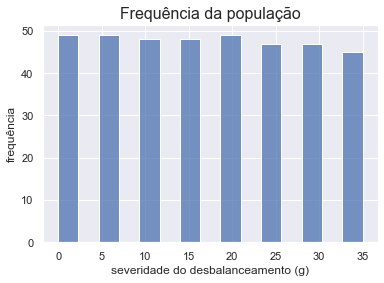

In [3]:
# armazena output em um array
output = np.array(df['severidade'])
# remove a coluna de outputs do df original
df.pop('severidade')

# plota distribuição da população
sns.histplot(output, bins=15)
plt.title('Frequência da população', fontsize=16)
plt.xlabel('severidade do desbalanceamento (g)')
plt.ylabel('frequência')
plt.show()

# Regressores

### Dados Originais

In [4]:
df.head()

,fundamental,ax1_1h,ax1_2h,ax1_3h,ax1_entr,ax1_kurt,ax1_mean,ax1_rms,ax2_1h,ax2_2h,...,tg1_kurt,tg1_mean,tg1_rms,tg2_1h,tg2_2h,tg2_3h,tg2_entr,tg2_kurt,tg2_mean,tg2_rms
0,13.6272,6.966357,0.510580,5.082876,3.063727,-0.886690,0.032697,87.310458,3.660366,1.684720,...,-0.270437,0.001106,3.332768,15.480691,7.594987,2.650111,2.635456,-0.142961,0.039913,48.052180
1,14.2284,5.608414,0.487584,6.771639,3.049969,-0.932425,0.031285,86.015864,3.133558,1.491533,...,-0.163261,0.001154,3.388859,14.169379,7.455570,2.611577,2.711809,-0.293248,-0.019935,51.543861
2,15.4308,4.343829,2.574365,30.017157,2.884913,-0.861553,-0.009577,73.196936,3.094011,1.519097,...,-0.056329,-0.000269,3.841905,9.420763,5.237704,1.671434,2.673544,-0.265470,0.116550,50.609899
3,16.2324,5.357364,2.606845,39.454727,2.780495,-0.823096,0.025364,63.387665,3.847720,1.071455,...,-0.167401,0.002180,3.830312,11.122514,3.149082,2.196249,2.572040,-0.364828,0.081646,45.340454
4,16.8336,4.905962,1.965951,23.055039,2.871253,-0.867789,0.012506,70.861639,2.812728,0.712845,...,-0.006069,0.000525,4.325995,10.391749,3.257844,1.170166,3.550595,-0.724785,-0.061868,127.442876


### Dados normalizados pelo inverso da rotação

In [5]:
df_norm = pd.DataFrame(df['fundamental'])
for col in df.columns[1:]:
    df_norm[col + '/v'] = df[col] / df['fundamental']

df_norm.head()

,fundamental,ax1_1h/v,ax1_2h/v,ax1_3h/v,ax1_entr/v,ax1_kurt/v,ax1_mean/v,ax1_rms/v,ax2_1h/v,ax2_2h/v,...,tg1_kurt/v,tg1_mean/v,tg1_rms/v,tg2_1h/v,tg2_2h/v,tg2_3h/v,tg2_entr/v,tg2_kurt/v,tg2_mean/v,tg2_rms/v
0,13.6272,0.511210,0.037468,0.372995,0.224824,-0.065068,0.002399,6.407073,0.268607,0.123629,...,-0.019845,0.000081,0.244567,1.136014,0.557340,0.194472,0.193397,-0.010491,0.002929,3.526196
1,14.2284,0.394170,0.034268,0.475924,0.214358,-0.065533,0.002199,6.045364,0.220233,0.104828,...,-0.011474,0.000081,0.238176,0.995852,0.523992,0.183547,0.190591,-0.020610,-0.001401,3.622604
2,15.4308,0.281504,0.166833,1.945275,0.186958,-0.055833,-0.000621,4.743561,0.200509,0.098446,...,-0.003650,-0.000017,0.248976,0.610517,0.339432,0.108318,0.173260,-0.017204,0.007553,3.279797
3,16.2324,0.330041,0.160595,2.430616,0.171293,-0.050707,0.001563,3.905009,0.237040,0.066007,...,-0.010313,0.000134,0.235967,0.685205,0.194000,0.135300,0.158451,-0.022475,0.005030,2.793207
4,16.8336,0.291439,0.116787,1.369585,0.170567,-0.051551,0.000743,4.209536,0.167090,0.042347,...,-0.000361,0.000031,0.256986,0.617322,0.193532,0.069514,0.210923,-0.043056,-0.003675,7.570744


### Dados normalizados pelo inverso da rotação AO QUADRADO

In [6]:
df_sqr_norm = pd.DataFrame(df['fundamental'])
for col in df.columns[1:]:
    df_sqr_norm[col + '/v^2'] = df[col] / df['fundamental']**2
df_sqr_norm.head()

,fundamental,ax1_1h/v^2,ax1_2h/v^2,ax1_3h/v^2,ax1_entr/v^2,ax1_kurt/v^2,ax1_mean/v^2,ax1_rms/v^2,ax2_1h/v^2,ax2_2h/v^2,...,tg1_kurt/v^2,tg1_mean/v^2,tg1_rms/v^2,tg2_1h/v^2,tg2_2h/v^2,tg2_3h/v^2,tg2_entr/v^2,tg2_kurt/v^2,tg2_mean/v^2,tg2_rms/v^2
0,13.6272,0.037514,0.002749,0.027371,0.016498,-0.004775,0.000176,0.470168,0.019711,0.009072,...,-0.001456,0.000006,0.017947,0.083364,0.040899,0.014271,0.014192,-0.000770,0.000215,0.258762
1,14.2284,0.027703,0.002408,0.033449,0.015065,-0.004606,0.000155,0.424880,0.015478,0.007368,...,-0.000806,0.000006,0.016739,0.069990,0.036827,0.012900,0.013395,-0.001449,-0.000098,0.254604
2,15.4308,0.018243,0.010812,0.126064,0.012116,-0.003618,-0.000040,0.307409,0.012994,0.006380,...,-0.000237,-0.000001,0.016135,0.039565,0.021997,0.007020,0.011228,-0.001115,0.000489,0.212549
3,16.2324,0.020332,0.009893,0.149739,0.010553,-0.003124,0.000096,0.240569,0.014603,0.004066,...,-0.000635,0.000008,0.014537,0.042212,0.011951,0.008335,0.009761,-0.001385,0.000310,0.172076
4,16.8336,0.017313,0.006938,0.081360,0.010133,-0.003062,0.000044,0.250067,0.009926,0.002516,...,-0.000021,0.000002,0.015266,0.036672,0.011497,0.004129,0.012530,-0.002558,-0.000218,0.449740


# Avaliação de modelos
Será utilizado o K-Fold Crossvalidation

In [7]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GroupKFold, StratifiedKFold

# kfold =           KFold(n_splits=8, shuffle=True, random_state=42)
kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoLarsCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import sklearn.metrics as metrics

## Dados não normalizados

In [9]:
def avaliar_modelos(regressores):
    # salva a ordem das features
    feature_list = list(regressores[0])
    # converte df para array
    data = np.array(regressores[0])

    # encontra o melhor subset de features por eliminação recursiva 
    rfecv = RFECV(estimator=LinearRegression(), step=1, cv=kfold,
                scoring='neg_root_mean_squared_error')
    rfecv.fit(data, output)

    # encontra o melhor alpha para a regressão Ridge
    regRidge = RidgeCV(cv=5).fit(data, output)

    # encontra o melhor alpha para a regressão Lasso
    regLasso = LassoLarsCV(cv=5).fit(data, output)


    modelos = [
        ('Regressão linear', Pipeline([('Feature Selection', rfecv), ('Modelo', LinearRegression())])  ),
        ('Regressão Ridge',  Ridge(alpha=regRidge.alpha_)  ),
        ('Regressão Lasso',  Lasso(alpha=regLasso.alpha_), ),
        ('Arvore de decisão regressora',  DecisionTreeRegressor()  ),
        ('Floresta aleatória regressora', RandomForestRegressor(n_estimators= 10, random_state=42)  ), 
    ]

    # aplica o cross-validation
    scores=[]
    for modelo in modelos:
        score = cross_val_score(modelo[1], data, output, cv=kfold, scoring='neg_root_mean_squared_error', n_jobs=-1)
        scores.append(score)

    # resume os scores em um DataFrame
    df_scores = pd.DataFrame()
    for i, modelo in enumerate(modelos):
        df_scores[ modelo[0] ] = -scores[i]
    
    df_scores = df_scores.melt().sort_values('value')
    df_scores.rename(columns={'variable':'modelo', 'value':"RMSE"}, inplace=True)
    df_scores['regressores'] = regressores[1]

    return df_scores


In [10]:
grupo_regressores = [
    (df,          'original'),
    (df_norm,     'normalizado 1/vel'),
    (df_sqr_norm, 'normalizado 1/v^2'),
]


df_scores_TOT = pd.DataFrame()
for dados in grupo_regressores:
    df_scores_TOT = pd.concat([df_scores_TOT, avaliar_modelos(dados)])

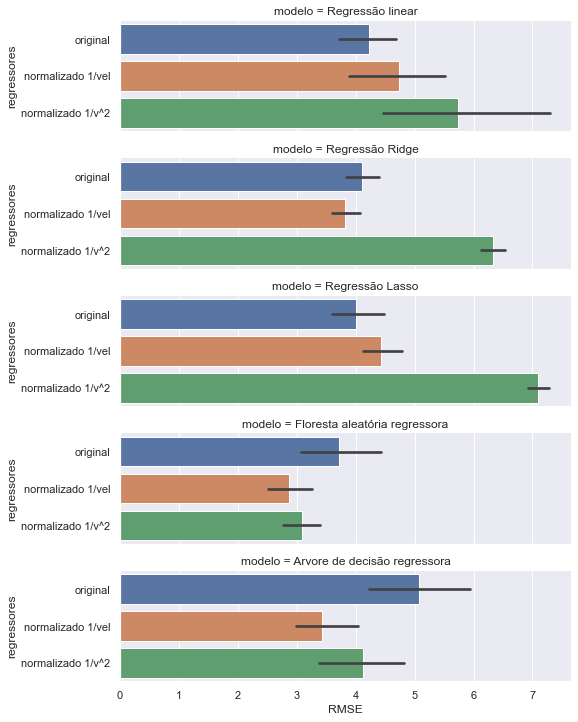

In [11]:
# plota o score de cada modelo em cada fold
sns.catplot(data=df_scores_TOT.sort_values(['modelo', 'regressores'], ascending=False), y='regressores', x="RMSE", 
            kind="bar", orient='h', row='modelo', height=2, aspect=4);

Conclusão: em todos os casos, o melhor conjunto para a regressão é aquele que contém todas as características juntas

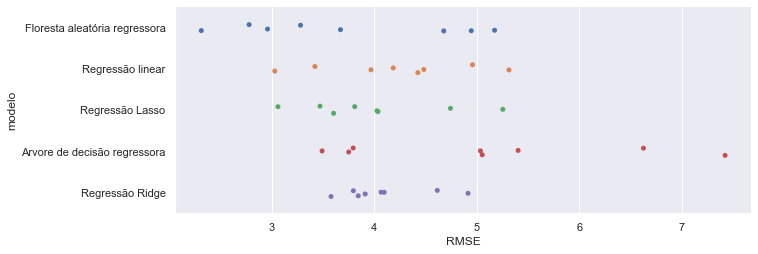

In [12]:
# plota o score de cada modelo em cada fold
sns.catplot(data=df_scores_TOT.query("regressores == 'original'"), y='modelo', x="RMSE",  
            orient='h', height=3.5, aspect=3);

# Visualizando modelos com Train-Test Split

## Modelos lineares

In [13]:
regressores = df

# salva a ordem das features
feature_list = list(regressores.columns)
# converte df para array
data = np.array(regressores)

Melhor desempenho com 47 características selecionadas.


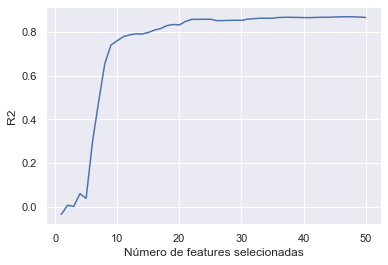

In [14]:
# encontra o melhor subset de features por eliminação recursiva 
rfecv = RFECV(estimator=LinearRegression(), step=1, cv=kfold,
              scoring='r2')
rfecv.fit(data, output)

plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlabel("Número de features selecionadas")
plt.ylabel("R2")
print('Melhor desempenho com', rfecv.n_features_, 'características selecionadas.')

In [15]:
# limita o número de entradas no regressor linear para evitar overfitting
rfe = RFE(estimator=LinearRegression(), n_features_to_select=22)

# encontra o melhor alpha para a regressão Ridge
regRidge = RidgeCV(cv=8).fit(data, output)

# encontra o melhor alpha para a regressão Lasso
regLasso = LassoLarsCV(cv=8).fit(data, output)


modelos = [
    ('Regressão linear', Pipeline( [('Feature Selection', rfe), ('Modelo', LinearRegression())] )  ),
    ('Regressão Ridge',  Ridge(alpha=regRidge.alpha_)  ),
    ('Regressão Lasso',  Lasso(alpha=regLasso.alpha_), ),
    ('Árvore de decisão regressora',  DecisionTreeRegressor()  ),
    ('Floresta aleatória regressora', RandomForestRegressor(n_estimators= 10, random_state=42)  ), 
]

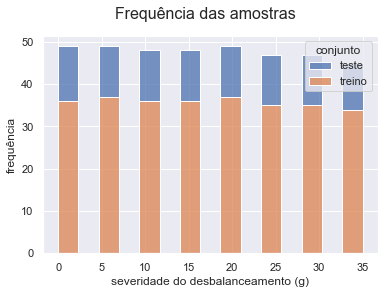

In [16]:
from sklearn.model_selection import train_test_split

# separa os conjuntos de treino e teste com amostragem estratificada,
# logo, mantendo a proporção para cada tipo de defeito
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size = 0.25, stratify=output, random_state=42) 

output_amostrado = pd.DataFrame( {'severidade': np.concatenate((y_test, y_train)),
                                  'fundamental': np.concatenate((X_test[:,0], X_train[:,0])),
                                  'conjunto': ['teste']*len(y_test) + ['treino']*len(y_train)} )

sns.histplot(output_amostrado, x='severidade', stat="count", multiple="stack", hue='conjunto', bins=15)
plt.suptitle('Frequência das amostras', fontsize=16)
plt.xlabel('severidade do desbalanceamento (g)')
plt.ylabel('frequência');

# sns.jointplot(data=output_amostrado, x='severidade', y='fundamental', hue='conjunto',
#                 kind='hist', bins=30, marginal_ticks=True, marginal_kws=dict(bins=15, fill=False, multiple="stack"));

In [17]:
resultados = [None]*len(modelos)
metricas = pd.DataFrame()

for i, modelo in enumerate(modelos):
    # treina os modelos com dados de treino
    modelo[1].fit(X_train, y_train)

    # prevê com o modelo a partir do conjunto de teste
    y_predicted = modelo[1].predict(X_test)

    # salva DataFrame com resultados
    resultados[i] = aux.gera_df_resultados(X_test, feature_list, y_predicted, y_test)

    # salva métricas com o desempenho do modelo
    metricas = pd.concat([ metricas, aux.gera_df_metricas(y_predicted, y_test, modelo[0], 'originais') ], ignore_index=True)

metricas

,modelo,dados,R2,MSE,RMSE,MAE
0,Regressão linear,originais,0.860114,17.932353,4.234661,2.877906
1,Regressão Ridge,originais,0.893407,13.664400,3.696539,2.818170
2,Regressão Lasso,originais,0.894248,13.556639,3.681934,2.775085
3,Árvore de decisão regressora,originais,0.814326,23.802083,4.878738,2.177083
4,Floresta aleatória regressora,originais,0.856980,18.334167,4.281842,2.239583


In [18]:
# for i, item in enumerate(id_modelos):
#     aux.plota_resultados(resultados[i], item, 'desbalanceamento')

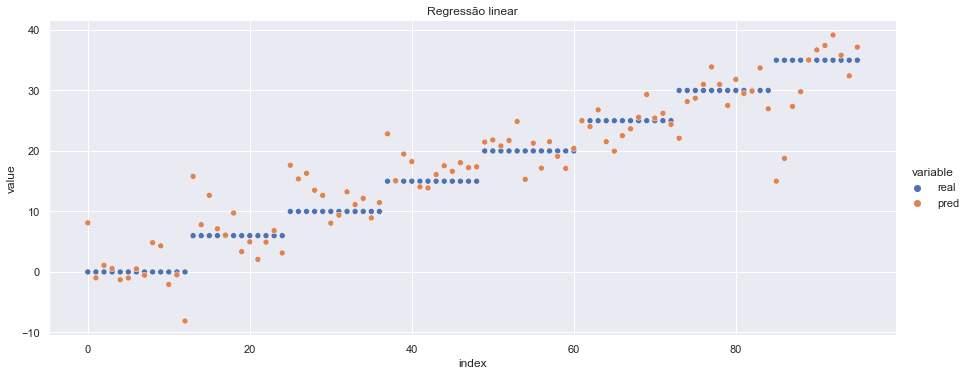

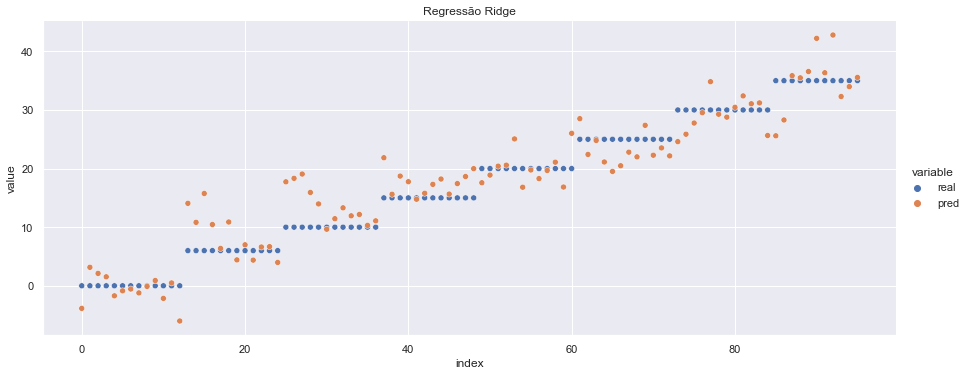

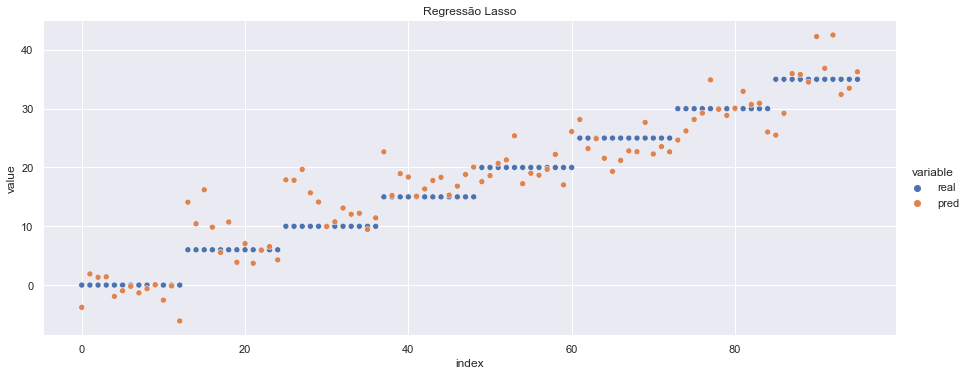

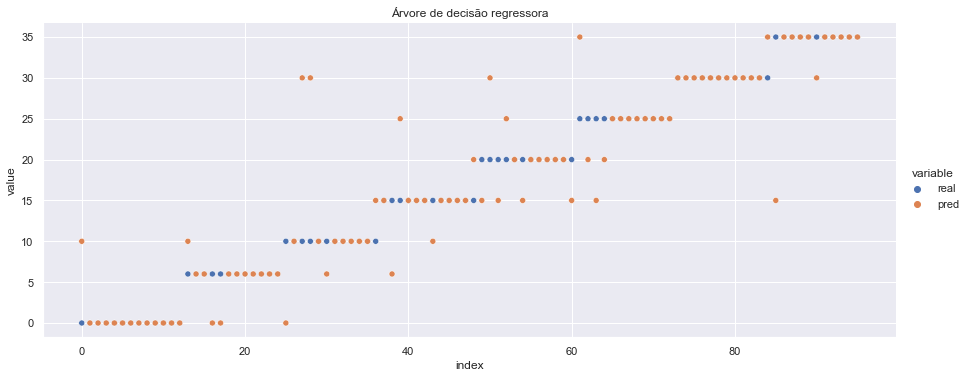

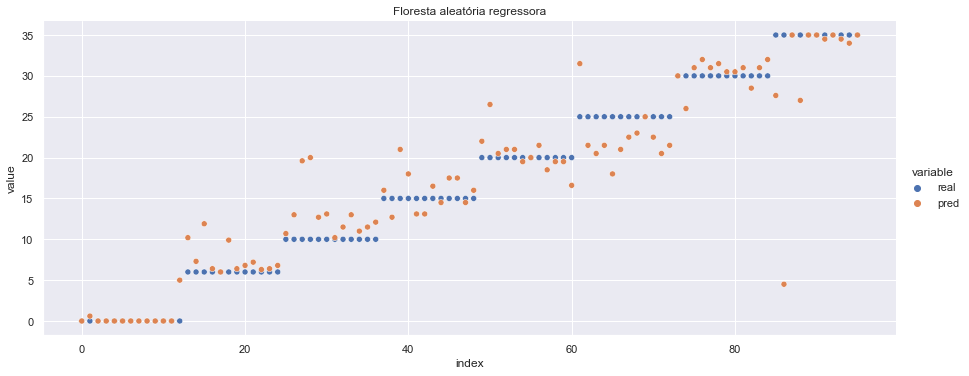

In [19]:
for i, modelo in enumerate(modelos):
    result = resultados[i].reset_index(drop=True).reset_index()
    result = result.melt(id_vars=['index', 'rotacao_discreta', 'erro'])
    sns.relplot(data=result, x='index', y='value', hue='variable', aspect=2.5)
    plt.title(modelo[0])

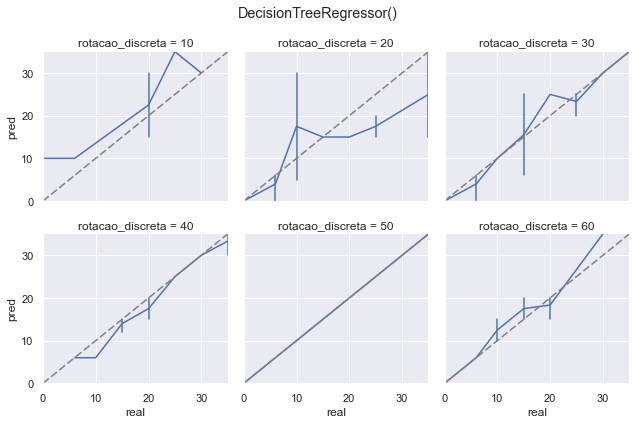

In [20]:
aux.plota_resultados_segregados(resultados[3], modelos[3][1], 'desbalanceamento')

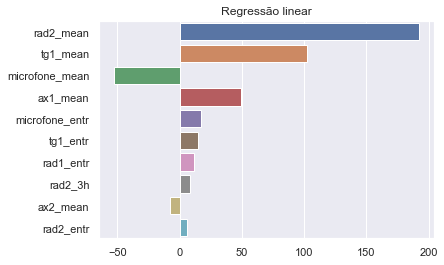

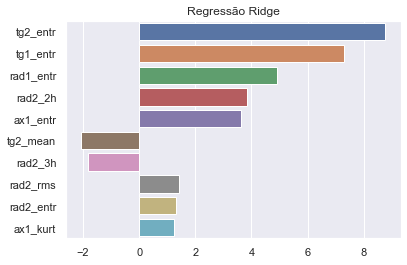

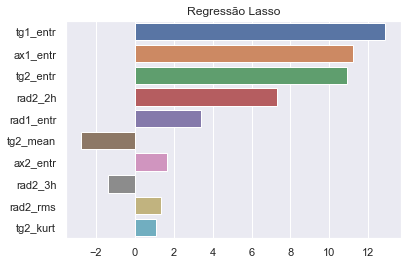

In [21]:
for i in range(3):
    modelo = modelos[i]
    linear_regression = modelo[1].fit(X_train, y_train)
    if modelo[0] == 'Regressão linear':
        coeficientes = pd.Series(linear_regression.named_steps['Modelo'].coef_, index=[i for (i, v) in zip(feature_list, rfe.support_) if v])
    else:
        coeficientes = pd.Series(linear_regression.coef_, index=feature_list)
    
    coeficientes = coeficientes[coeficientes.abs().sort_values(ascending=False)[:10].index]
    g = sns.barplot(y=coeficientes.index, x=coeficientes, orient='h')
    plt.title(modelo[0])
    plt.show()

### Conclusão
?

## Modelos baseados em árvore

In [22]:
regressores = df_norm

# salva a ordem das features
feature_list = list(regressores.columns)
# converte df para array
data = np.array(regressores)

modelos = [
    ('Árvore de decisão regressora',  DecisionTreeRegressor()  ),
    ('Floresta aleatória regressora', RandomForestRegressor(n_estimators= 10, random_state=42)  ), 
]


# separa os conjuntos de treino e teste com amostragem estratificada
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size = 0.25, stratify=output, random_state=42) 

output_amostrado = pd.DataFrame( {'severidade': np.concatenate((y_test, y_train)),
                                  'fundamental': np.concatenate((X_test[:,0], X_train[:,0])),
                                  'conjunto': ['teste']*len(y_test) + ['treino']*len(y_train)} )


resultados = [None]*len(modelos)

for i, modelo in enumerate(modelos):
    # treina os modelos com dados de treino
    modelo[1].fit(X_train, y_train)

    # prevê com o modelo a partir do conjunto de teste
    y_predicted = modelo[1].predict(X_test)

    # salva DataFrame com resultados
    resultados[i] = aux.gera_df_resultados(X_test, feature_list, y_predicted, y_test)

    # salva métricas com o desempenho do modelo
    metricas = pd.concat([ metricas, aux.gera_df_metricas(y_predicted, y_test, modelo[0], 'normalizados') ], ignore_index=True)

metricas

,modelo,dados,R2,MSE,RMSE,MAE
0,Regressão linear,originais,0.860114,17.932353,4.234661,2.877906
1,Regressão Ridge,originais,0.893407,13.664400,3.696539,2.818170
2,Regressão Lasso,originais,0.894248,13.556639,3.681934,2.775085
3,Árvore de decisão regressora,originais,0.814326,23.802083,4.878738,2.177083
4,Floresta aleatória regressora,originais,0.856980,18.334167,4.281842,2.239583
5,Árvore de decisão regressora,normalizados,0.922074,9.989583,3.160630,1.489583
6,Floresta aleatória regressora,normalizados,0.946489,6.859687,2.619101,1.536458


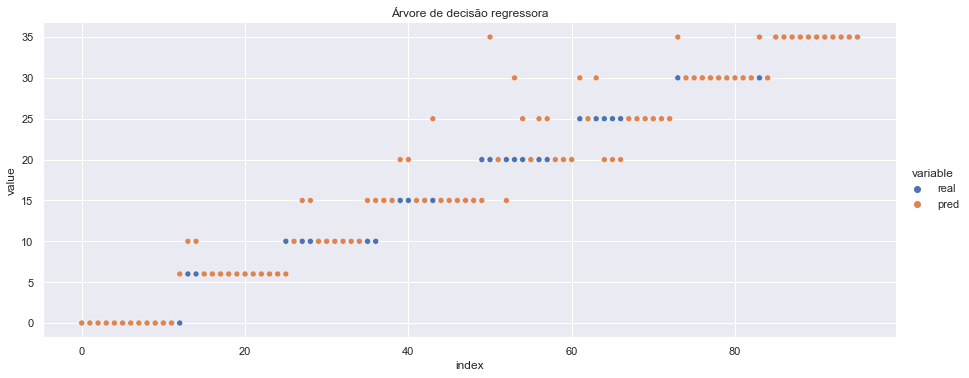

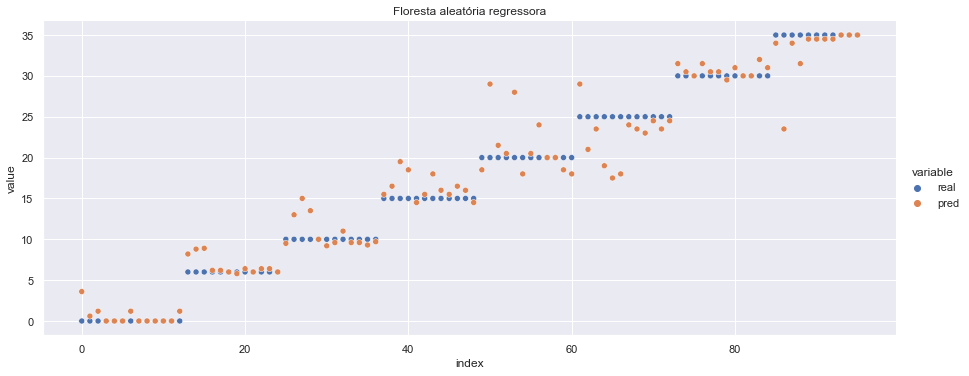

In [23]:
for i, modelo in enumerate(modelos):
    result = resultados[i].reset_index(drop=True).reset_index()
    result = result.melt(id_vars=['index', 'rotacao_discreta', 'erro'])
    sns.relplot(data=result, x='index', y='value', hue='variable', aspect=2.5)
    plt.title(modelo[0])

In [31]:
import SHAP

ModuleNotFoundError: No module named 'SHAP'

# TPOT <a class="anchor" id="TPOT"></a>
TPOT é um algoritmo Auto_ML, que gera o modelo otimizado após testes exaustivos.

In [24]:
# a reexecução do TPOT pode levar horas, dias..

# from tpot import TPOTRegressor
# pipeline_optimizer_hor_mis = TPOTRegressor()
# pipeline_optimizer_hor_mis.fit(train_data, train_labels[:,0])

In [25]:
#  print(pipeline_optimizer_hor_mis.score(test_data, test_labels[:,0]))
#  pipeline_optimizer_hor_mis.export('tpot_pipeline_hor_mis.py')

### Modelo gerado pelo TPOT (após 1 dia de busca)

In [26]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator

# Average CV score on the training set was: -0.009330433709391846
exported_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    StackingEstimator(estimator=AdaBoostRegressor(learning_rate=1.0, loss="exponential", n_estimators=100)),
    RandomForestRegressor(bootstrap=False, max_features=0.4, min_samples_leaf=4, min_samples_split=16, n_estimators=100)
)


exported_pipeline.fit(X_train, y_train)
y_predicted = exported_pipeline.predict(X_test)


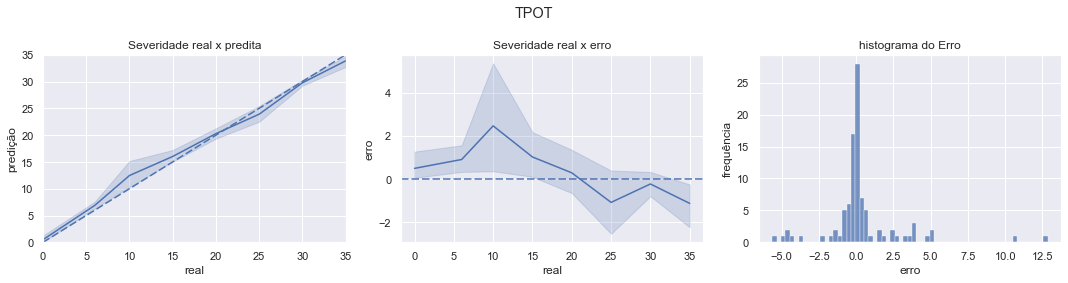

In [27]:
resultados_TPOT = aux.gera_df_resultados(X_test, feature_list, y_predicted, y_test)

aux.plota_resultados(resultados_TPOT, 'TPOT','desbalanceamento')

Text(0.5, 1.0, 'TPOT')

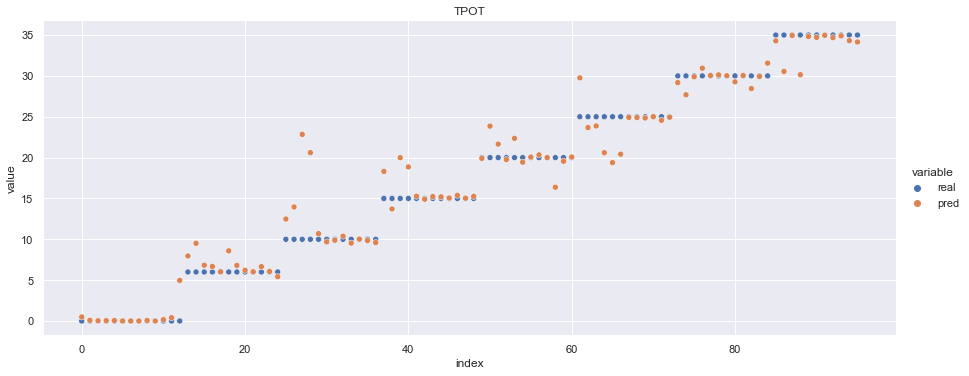

In [28]:
result = resultados_TPOT.reset_index(drop=True).reset_index()
result = result.melt(id_vars=['index', 'rotacao_discreta', 'erro'])
sns.relplot(data=result, x='index', y='value', hue='variable', aspect=2.5)
plt.title('TPOT')

In [29]:
metricas = pd.concat([ metricas, aux.gera_df_metricas(y_predicted, y_test, 'TPOT', 'normalizados') ], ignore_index=True)
metricas

,modelo,dados,R2,MSE,RMSE,MAE
0,Regressão linear,originais,0.860114,17.932353,4.234661,2.877906
1,Regressão Ridge,originais,0.893407,13.664400,3.696539,2.818170
2,Regressão Lasso,originais,0.894248,13.556639,3.681934,2.775085
3,Árvore de decisão regressora,originais,0.814326,23.802083,4.878738,2.177083
4,Floresta aleatória regressora,originais,0.856980,18.334167,4.281842,2.239583
5,Árvore de decisão regressora,normalizados,0.922074,9.989583,3.160630,1.489583
6,Floresta aleatória regressora,normalizados,0.946489,6.859687,2.619101,1.536458
7,TPOT,normalizados,0.951567,6.208702,2.491727,1.275437


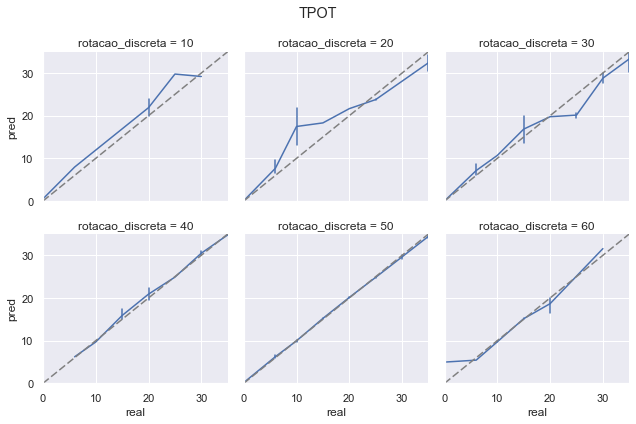

In [30]:
aux.plota_resultados_segregados(resultados_TPOT, 'TPOT', 'desbalanceamento')